<module 'covid_report.getdata' from '/Users/janceyliu/opt/anaconda3/envs/2060/lib/python3.10/site-packages/covid_report/getdata.py'>

geting daily reports
finish
getiing data
finsh
getting data from shanghai......
finish


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Country：USA
Latest Update Time：2023-03-10 04:31:51
----------------------------------------TOTAL-----------------------------------------
As of Now【USA】CumulativeConfirmed：103802550 | NewConfirmed：46931
As of Now【USA】CumulativeDeath：1123833 | NewDeath：590
As of Now【New York】CumulativeConfirmed：6794738 | NewConfirmed：1368
As of Now【New York】CumulativeDeath：77157 | NewDeath：5
----------------------------------------DETAIL----------------------------------------
Blueindicates confirmed cases
Redindicates deaths
--------------------------------------------------------------------------------------
Provincial Administrative Region Newconfirmed cases↓ Newdeaths  Confirmed Cases per 100,000 People CumulativeMortality Rate
Illinois                       10320            53             32223.403         1.016%        
California                     8734             205            30698.599         0.834%        
Ohio                           8332             47             29092.505         1.

Country：China
Latest Update Time：2023-03-10 04:21:03
----------------------------------------TOTAL-----------------------------------------
As of Now【China】CumulativeConfirmed：3382965 | NewConfirmed：0
As of Now【China】CumulativeDeath：18861 | NewDeath：1
As of Now【Beijing】CumulativeConfirmed：40775 | NewConfirmed：0
As of Now【Beijing】CumulativeDeath：20 | NewDeath：0
----------------------------------------DETAIL----------------------------------------
Blueindicates confirmed cases
Redindicates deaths
--------------------------------------------------------------------------------------
Provincial Administrative Region Newconfirmed cases↓ Newdeaths  Confirmed Cases per 100,000 People CumulativeMortality Rate
Anhui                          0                0              3.597             0.308%        
Beijing                        0                0              189.294           0.049%        
Chongqing                      0                0              47.437            0.075%        
F

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

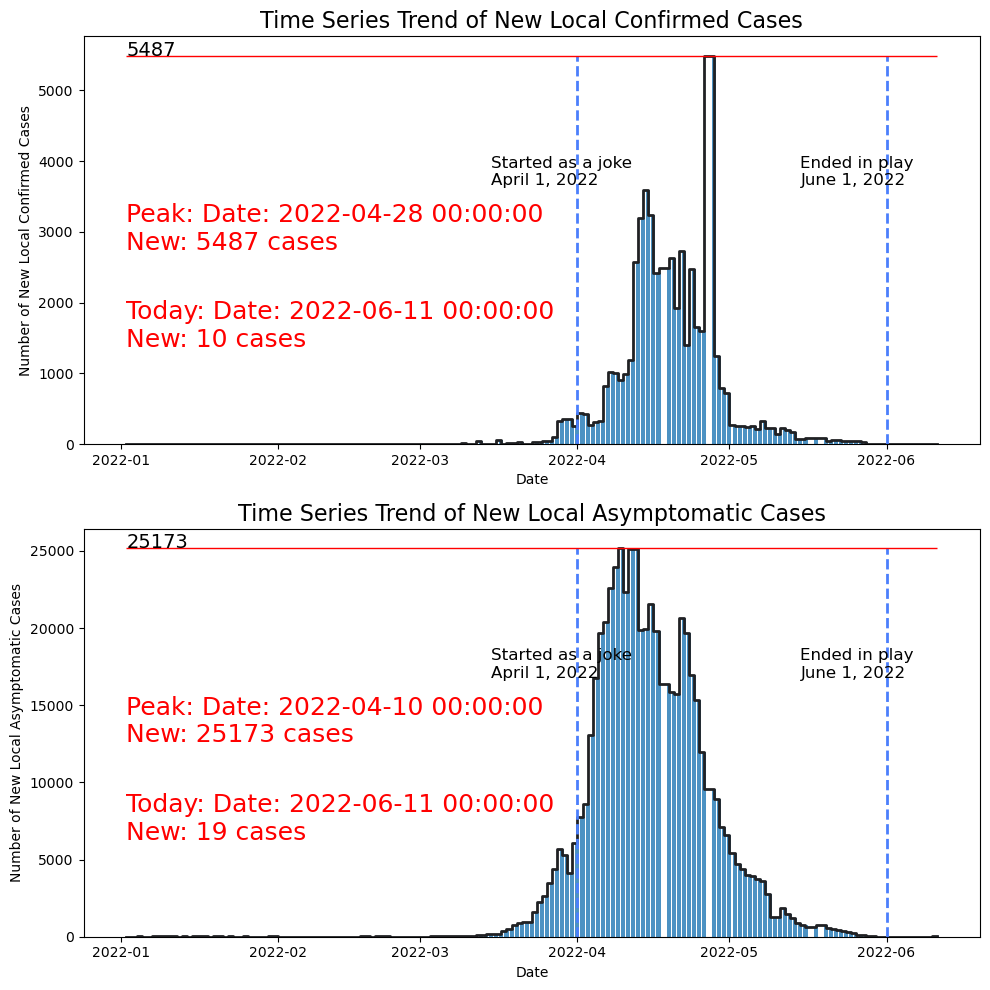

In [1]:
from get_covid_data import getdata,data_processing,covid_visualization

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = getdata.GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = getdata.GET_csse_covid_19_time_series()
shanghai_df = getdata.GET_shanghai_data()


# data processing
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = data_processing.ts_process_CHINA(ts_confirmed_global,clip=True)
ts_deaths_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_deaths_global,clip=True)
ts_recovered_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_recovered_global,clip=True)

ts_confirmed_US_incre,loc_data_us,sorted_state = data_processing.ts_process_US(ts_confirmed_us,clip=True)
ts_deaths_US_incre,_,_,population = data_processing.ts_process_US(ts_deaths_us,death = True,clip=True)

latest_data_CHINA = data_processing.daily_process(latest_data_global, country = 'China')
prev_data_CHINA = data_processing.daily_process(prev_data_global, country = 'China')
latest_data_US = data_processing.daily_process(latest_data_us, country = 'US')
prev_data_US = data_processing.daily_process(prev_data_us, country = 'US')


# visualization
covid_visualization.Decompose_US(
    ts_confirmed_US_incre,
    latest_data_US,
    prev_data_US,
    start='2020-03-01',
    # end='2022-06-01',
    ma = [7,30],
    method = 'New',             # method = '累计'
    specify = 'New York',        # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = 'Confirmed'
)

covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2020-03-01',
    # end='2022-06-01',
    ma = [7,30],
    method = 'New',              # method = '累计'
    specify = 'Beijing',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = 'Confirmed'
)

In [ ]:
! pip install pandas